# Pymaceuticals Inc.
---

### Analysis

- A corelation coefficient of 0.4 indicates a strong positive corelation between the variables mouse weight and average tumor volumne. As the mouse weight increases the relationship is direct. Heavier mice means there is more likeley to have larger tumor volumnes on average. Although there is a strong corelation , this does not necessarly imply causation - we cannot say weight causes tumors to grow larger without further investigation.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
print(f"Number of unique Mouse IDs: {merged_data['Mouse ID'].nunique()}")

Number of unique Mouse IDs: 249


In [2]:
# Checking the number of mice.
merged_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
# Find the Mouse IDs with duplicate Timepoints
duplicate_mouse_ids = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()

# Get all the data for these duplicate Mouse IDs
duplicate_mouse_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mouse_ids)]

# Display the data for duplicate Mouse IDs
duplicate_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = merged_data[~merged_data["Mouse ID"].isin(duplicate_mouse_ids)]

# Display the cleaned data
cleaned_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = cleaned_data.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_statistics = grouped_data["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"]
).rename(columns={
    "mean": "Mean",
    "median": "Median",
    "var": "Variance",
    "std": "Standard Deviation",
    "sem": "SEM"
})
# Assemble the resulting series into a single summary DataFrame.
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

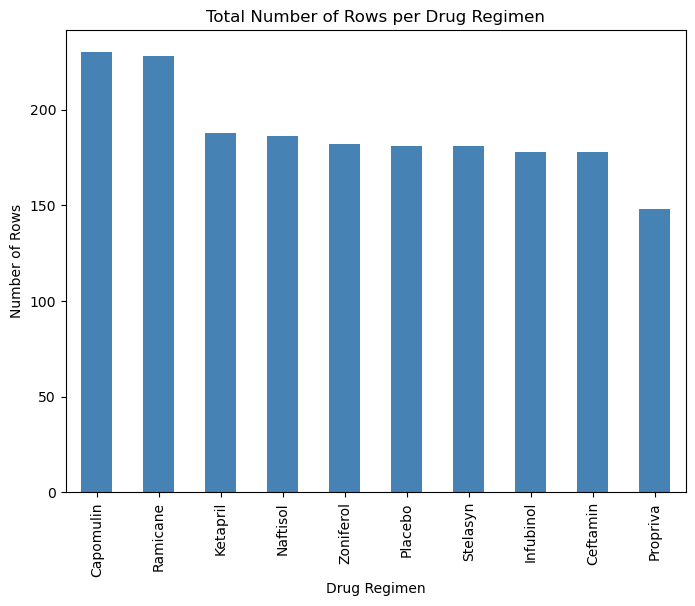

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by Drug Regimen and count the number of rows (Mouse ID/Timepoints)
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()

# Generate a bar plot using Pandas
drug_regimen_counts.plot(kind="bar", title="Total Number of Rows per Drug Regimen", xlabel="Drug Regimen", ylabel="Number of Rows", figsize=(8, 6), color="steelblue")

# Display the plot
import matplotlib.pyplot as plt
plt.show()


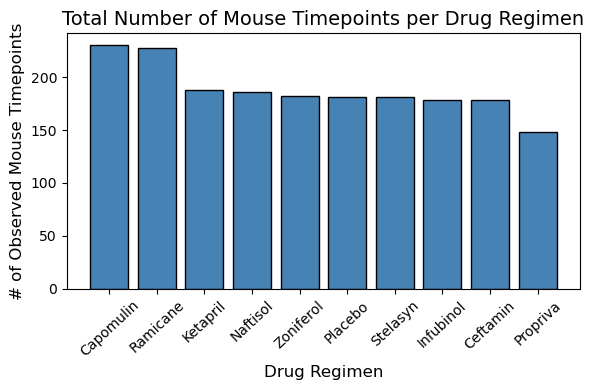

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(6, 4))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color="steelblue", edgecolor="black")

# Add titles and labels
plt.title("Total Number of Mouse Timepoints per Drug Regimen", fontsize=14)
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=43, fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

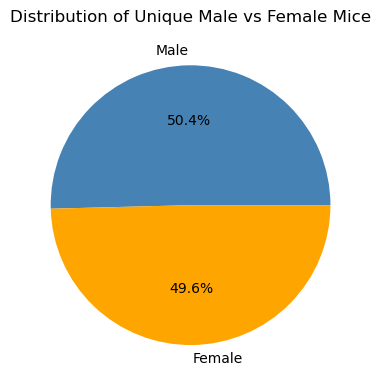

In [18]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice_gender = cleaned_data.drop_duplicates(subset=["Mouse ID"])["Sex"].value_counts()

unique_mice_gender.plot(
    kind="pie",
    autopct="%1.1f%%",  # Add percentages to the pie chart
    title="Distribution of Unique Male vs Female Mice",
    ylabel="",  # Remove the default ylabel
    figsize=(4, 4),
    colors=["steelblue", "orange"]
)
# Make the pie chart
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = cleaned_data[cleaned_data["Drug Regimen"].isin(selected_treatments)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")

# Display the resulting DataFrame
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [27]:
import numpy as np


In [28]:
# Put treatments into a list for the loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Loop through each treatment
for treatment in treatments:
    # Locate the rows for mice on each drug regimen and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Locate potential outliers
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    # Print the results for the current treatment
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


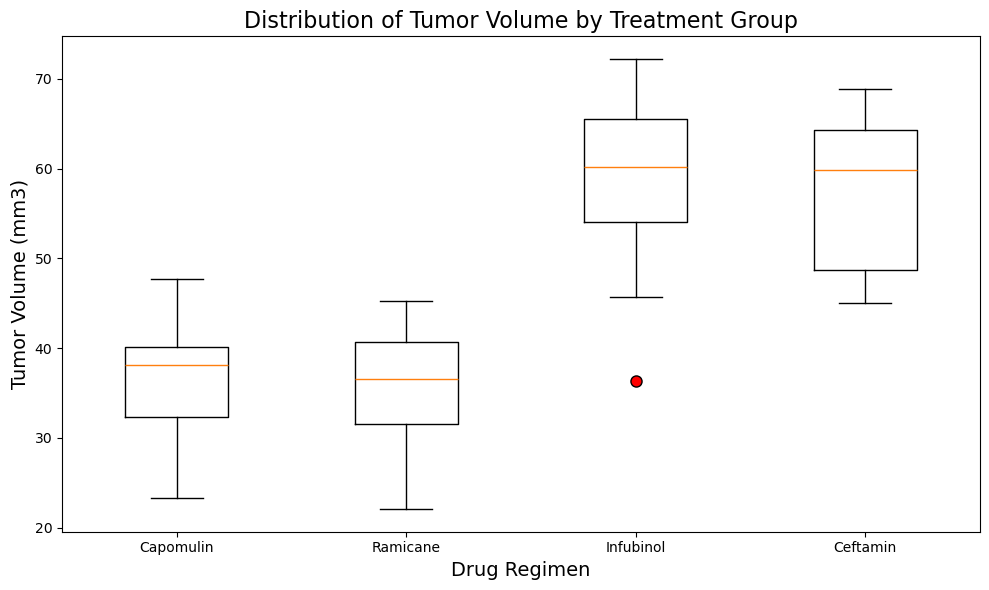

In [30]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_data = [final_tumor_volume[final_tumor_volume["Drug Regimen"] == treatment]["Tumor Volume (mm3)"] for treatment in treatments]

# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_data, labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8, 'linestyle': 'none'})

# Add title and labels
plt.title("Distribution of Tumor Volume by Treatment Group", fontsize=16)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

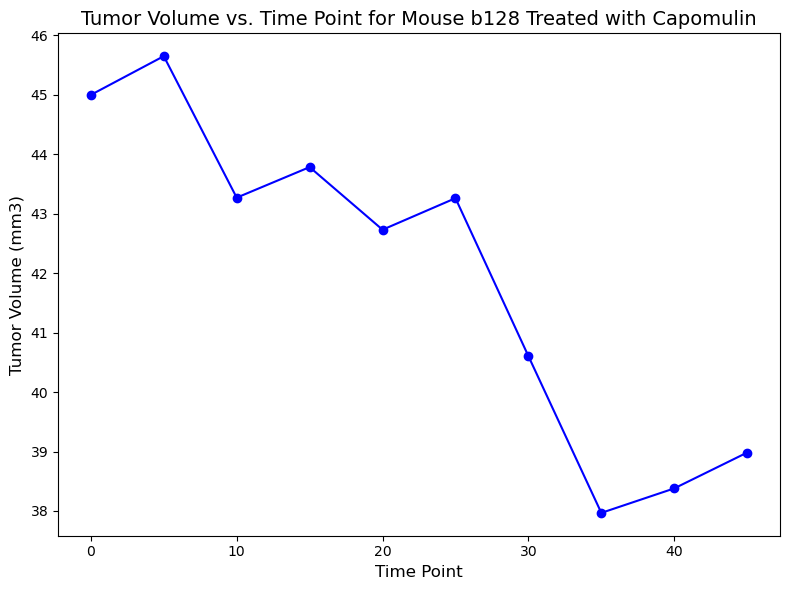

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select a single mouse treated with Capomulin
mouse_id = final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Capomulin"]["Mouse ID"].iloc[0]

# Filter the data for the selected mouse
mouse_data = cleaned_data[cleaned_data["Mouse ID"] == mouse_id]

# Generate the line plot
plt.figure(figsize=(8, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker="o", color="b")

# Add title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin", fontsize=14)
plt.xlabel("Time Point", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

# Display the plot
plt.grid(False)
plt.tight_layout()
plt.show()



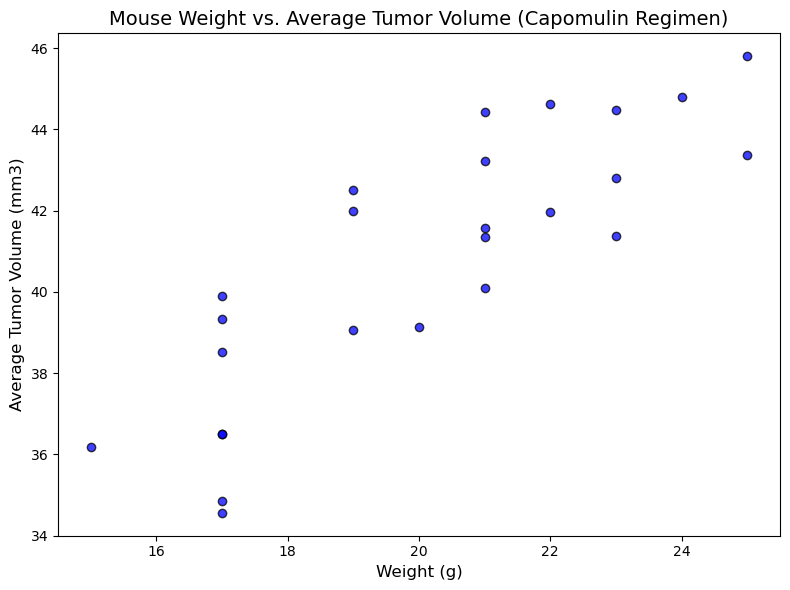

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, avg_tumor_volume, color="blue", edgecolor="black", alpha=0.75)

# Add title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


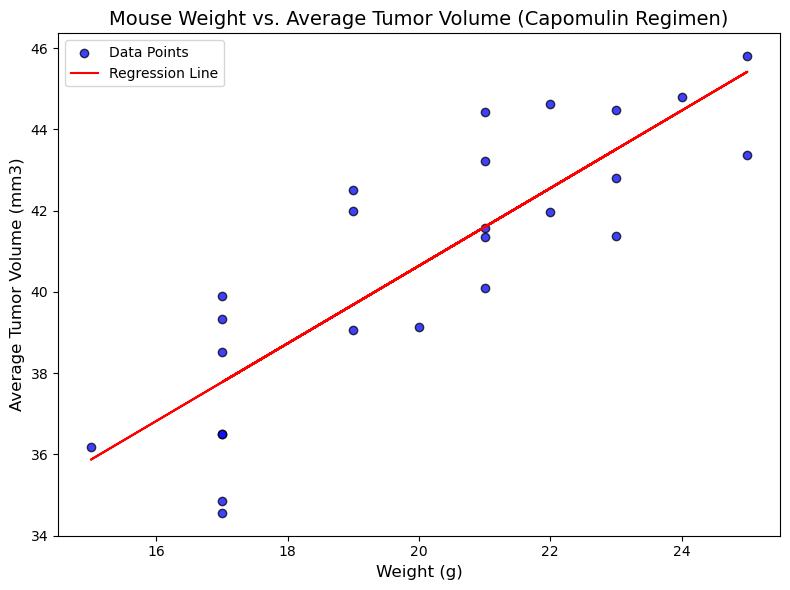

In [34]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Filter data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation coefficient
correlation = mouse_weights.corr(avg_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(mouse_weights, avg_tumor_volume)

# Generate regression values
regress_values = slope * mouse_weights + intercept

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, avg_tumor_volume, color="blue", edgecolor="black", alpha=0.75, label="Data Points")

# Plot the regression line
plt.plot(mouse_weights, regress_values, color="red", label="Regression Line")

# Add title and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)", fontsize=14)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.legend()

# Display the plot
plt.grid(False)
plt.tight_layout()
plt.show()


A corelation coefficient of 0.4 indicates a strong positive corelation between the variables mouse weight and average tumor volumne. As the mouse weight increases the relationship is direct. Heavier mice means there is more likeley to have larger tumor volumnes on average. Although there is a strong corelation , this does not necessarly imply causation - we cannot say weight causes tumors to grow larger without further investigation.